# **Bonus 2 - Class Imbalance**

In Bonus 2, we examine whether balancing the classes in the breast cancer dataset improves classification performance. We apply two widely used techniques: SMOTE, which synthetically generates new minority class samples, and Random OverSampling, which randomly duplicates samples from the minority class. Both methods are applied to the original dataset, and we retrain the winner model (Logistic Regression with all 30 features).

---
---

In [ ]:
# ------------- Setup and Imports ------------- 
import os
import sys
import numpy as np
import pandas as pd

sys.path.append('../')

from src.utils import *
from src.classes import *
from sklearn.linear_model import LogisticRegression


# Seed for reproducibility
np.random.seed(42)

In [2]:
# ------------- Load Dataset -------------

scaled_bc = load_dataset("../data/breast_cancer_final_data.csv")

# ------------- Split target and features -------------
X, y = split_features_target(scaled_bc, "diagnosis")

# ------------- Directory for Saving Models -------------
os.makedirs("../models", exist_ok=True)

In [3]:
# Logistic Regression (baseline)
classifier = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    C=0.5,
    l1_ratio=0.0,
    max_iter=10000,
    random_state=42
)

# SMOTE
X_smote, y_smote = apply_smote(X, y)

# Random Oversampling
X_ros, y_ros = apply_random_oversampling(X, y)


In [4]:
# Original (imbalanced)
baseline, smote, ros = classifier, classifier, classifier
baseline.fit(X, y)
scores_baseline = evaluate_model_cv(X, y, baseline)

# SMOTE
smote.fit(X_smote, y_smote)
scores_smote = evaluate_model_cv(X_smote, y_smote, smote)

# Random Oversampling
ros.fit(X_ros, y_ros)
scores_ros = evaluate_model_cv(X_ros, y_ros, ros)

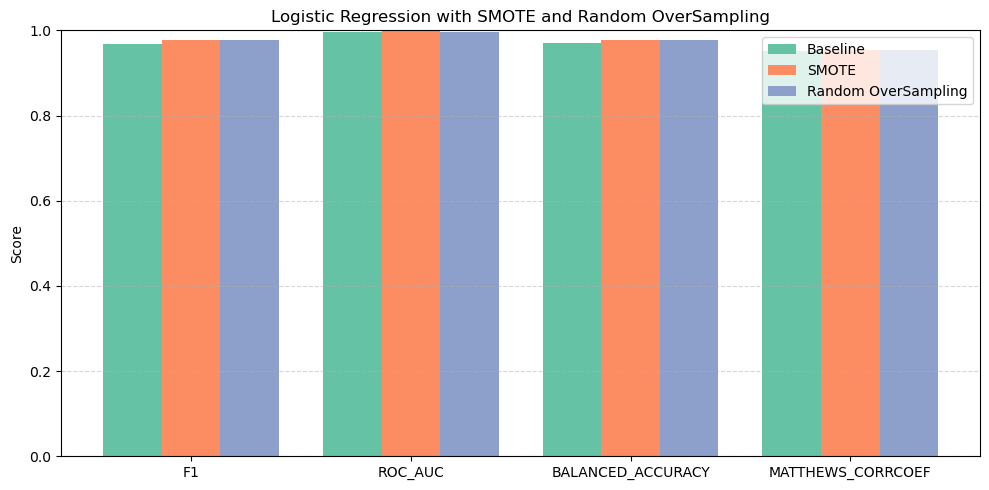

In [5]:
results_bonus2 = {
    "Baseline": scores_baseline,
    "SMOTE": scores_smote,
    "Random OverSampling": scores_ros
}

plot_fs_grouped_barplot(
    results_bonus2,
    title="Logistic Regression with SMOTE and Random OverSampling"
)

---
---
